In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

原图：img


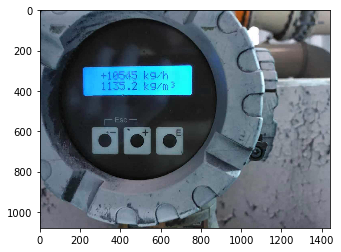

灰度图：img_gray


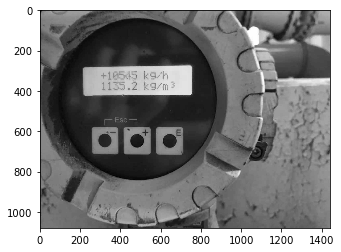

In [83]:
img = cv.imread('./gauge_imgs/number-2.jpg')
print('原图：img')
plt.imshow(img,'gray')
plt.show()
img_copy=img.copy()
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
height, width = img.shape[:2]
print('灰度图：img_gray')
plt.imshow(img_gray,'gray')
plt.show()

轮廓：img_copy


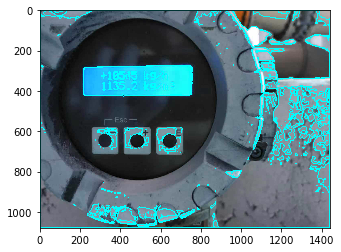

In [86]:
thresh =160
maxValue = 255
th1, img_dst = cv.threshold(img_gray, thresh, maxValue, cv.THRESH_BINARY_INV);
img_dst,contours, hierarchy = cv.findContours(img_dst,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img_copy,contours,-1,(0,255,255),3)

print('轮廓：img_copy')
plt.imshow(img_copy)
plt.show()

过滤后的轮廓数 1


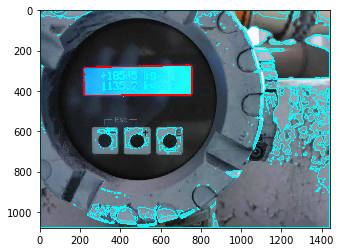

In [87]:
#轮廓过滤
contours = list(filter(lambda x: cv.contourArea(x)>=5e4,contours))
contours = list(filter(lambda x: cv.contourArea(x)<5e5,contours))
print('过滤后的轮廓数',len(contours))
cv.drawContours(img_copy,contours,-1,(255,0,0),5)
plt.imshow(img_copy)
plt.show()

215 273 540 152
裁剪后的原图：masked


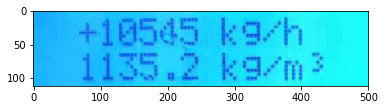

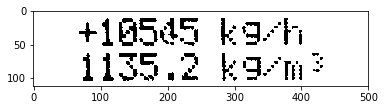

In [91]:
x, y, w, h = cv.boundingRect(contours[0])
print(x, y, w, h )
bound=20
masked=img[y+bound:y+h-bound,x+bound:x+w-bound]
print('裁剪后的原图：masked')
plt.imshow(masked,'gray')
plt.show()
#二值化
masked_copy=masked.copy()
masked= cv.cvtColor(masked, cv.COLOR_BGR2GRAY)
thresh = 170
maxValue = 255
th, masked = cv.threshold(masked, thresh, maxValue, cv.THRESH_BINARY);

plt.imshow(masked,'gray')
plt.show()

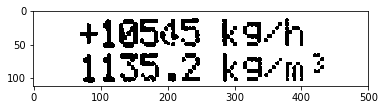

In [92]:
kernel = np.ones((2,2), np.uint8)
masked = cv.dilate(masked, kernel)
masked = cv.erode(masked, kernel)
masked = cv.erode(masked, kernel)
plt.imshow(masked,'gray')
plt.show()

In [93]:
#裁剪后新图片的高度和宽度  height, width
height, width = masked.shape[:2]

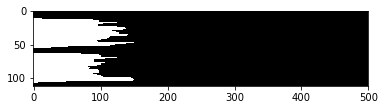

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 89, 94, 98, 98, 98, 126, 105, 100, 97, 97, 95, 126, 137, 141, 139, 135, 124, 118, 124, 127, 128, 128, 121, 142, 140, 117, 115, 114, 111, 110, 101, 95, 96, 97, 91, 151, 139, 124, 122, 115, 101, 52, 27, 0, 0, 0, 0, 0, 0, 0, 0, 71, 98, 100, 102, 102, 100, 126, 107, 90, 91, 91, 84, 91, 107, 102, 102, 101, 96, 96, 82, 85, 85, 83, 80, 97, 98, 99, 99, 98, 92, 90, 96, 96, 102, 104, 134, 147, 149, 152, 151, 149, 138, 50, 7, 0, 0, 0, 0, 0]


In [94]:
#水平投影  
#统计每一行的黑点数 z为每一行的黑点数
Bpoints = [0]*height
a = 0
HorImage = np.zeros((height, width, 3), np.uint8) 
for y in range(0, height):
    for x in range(0, width):
        if masked[y,x] == 0:
            a = a + 1
        else :
            continue
    Bpoints[y] = a 
    a = 0

#绘制水平投影图
#l = len(z)
for y in range(0,height):
    for x in range(0, Bpoints[y]):
        b = (255,255,255)
        HorImage[y,x] = b
plt.imshow(HorImage)
plt.show()
print(Bpoints)

In [95]:
#Rows_y 保存的是每一行的始末位置的y值
#rows_num 为行数

Rows_y = [[0 for col in range(2)] for row in range(height)]
#根据水平投影值选定行分割点
inline = 1
start = 0
end=0
rows_num = 0
for i in range(0,height):
    if (inline == 1 and Bpoints[i] >0):  #从空白区进入文字区
        print('从空白区进入文字区',Bpoints[i])
        start = i  #记录起始行分割点
        inline = 0
    else:
        if ((i - start > 10) and Bpoints[i]== 0 and inline == 0) :  #从文字区进入空白区
            inline = 1
            end=i
            Rows_y[rows_num][0] = start - 2  #保存行分割位置
            Rows_y[rows_num][1] = end + 2
            rows_num = rows_num + 1
print('共分割为 %d 行' % rows_num)
print('起始位置分别为',Rows_y[0:rows_num])

从空白区进入文字区 13
从空白区进入文字区 71
共分割为 2 行
起始位置分别为 [[9, 57], [61, 109]]


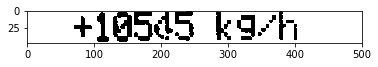

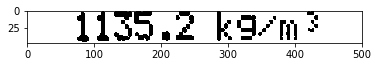

In [96]:
#分别显示每一行的图片
for k in range(0,rows_num):
    plt.imshow(masked[Rows_y[k][0]:Rows_y[k][1],0:width],'gray')
    plt.show()

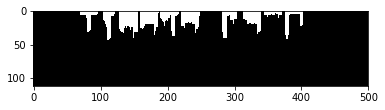

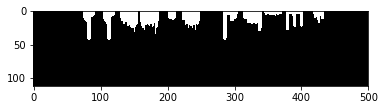

In [97]:
#投影黑点数
Bpoints = np.zeros((rows_num,width))

#对每一行进行垂直投影
#垂直投影：统计并存储每一列的黑点数
for p in range(0, rows_num):
    for x in range(0, width):               
        for y in range(Rows_y[p][0], Rows_y[p][1]):
            if masked[y,x]== 0:
                a = a + 1
            else :
                continue
        Bpoints[p][x] = a      
        a = 0
    #创建空白图片，绘制垂直投影图
    l = len(Bpoints[p])
    VerImage = np.zeros((height, width, 3), np.uint8) 
    for x in range(0,width):
        for y in range(0,int(Bpoints[p][x])):
            b = (255,255,255)
            VerImage[y,x] = b
    plt.imshow(VerImage)
    plt.show()

In [98]:
#Cols_x为每一行的垂直切割后的x值的始末值
Cols_x =np.zeros((rows_num,width,2))   
print(Cols_x.shape)

(2, 500, 2)


In [99]:
#对每一行垂直投影、分割
#垂直分割点
cols_nums=np.zeros(rows_num)
for p in range(Bpoints.shape[0]):  
    print(Bpoints[p])
    incol = 1
    start1 = 0
    cols_num = 0
    for i1 in range(0,width):
        if (incol == 1 and Bpoints[p][i1] > 0 ):  #从空白区进入文字区
            start1 = i1  #记录起始列分割点
            incol = 0
        else:
            if((i1 - start1 > 3) and Bpoints[p][i1] == 0 and incol == 0 ) :  #从文字区进入空白区
                end1=i1
                incol = 1
                Cols_x[p][cols_num][0] = start1  #保存列分割位置
                Cols_x[p][cols_num][1] = end1
                cols_num = cols_num + 1  
    cols_nums[p]=cols_num
    
    print('第 %d 行共分割为 %d 列' %(p+1,cols_num) )
    print('起始位置分别为',Cols_x[p][0:cols_num])
#cols_nums 存储每一行的数字数
cols_nums=cols_nums.astype(int)
print(cols_nums)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  6.
  6.  6.  6.  6.  6.  6.  6. 10. 29. 31. 31. 31. 30. 28. 11.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  4.  0.  0.  0.  0.  0.  0.  0.  9. 13. 15. 16.
 20. 24. 42. 43. 43. 43. 42. 41. 12.  8.  8.  8.  7.  5.  0.  0.  0.  0.
  0.  0.  0. 27. 30. 31. 31. 31. 41. 33. 26. 23. 23. 26. 29. 22. 22. 22.
 24. 28. 28. 24. 24. 23. 41. 32. 32. 32. 32. 31. 25.  0.  0. 10. 25. 26.
 27. 27. 26. 29. 22. 20. 21. 20. 20. 20. 20. 20. 20. 20. 19. 20. 20. 20.
 24. 36. 30. 25. 24. 24. 20.  3.  0.  0. 10. 12. 13. 15. 16. 18. 22. 15.
 16. 13. 15. 15. 11. 11. 10.  6. 30. 36. 37. 38. 38. 38.  8.  7.  7.  6.
  6.  4.  0.  0.  0. 22. 23. 23. 23. 23. 26. 18. 18. 18. 18. 15. 17. 18.
 18. 18. 17. 18. 20. 20. 20. 20. 33. 27. 27. 27. 26

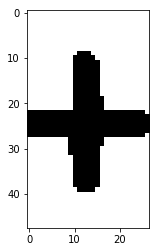

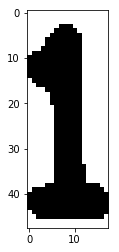

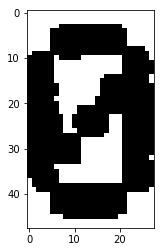

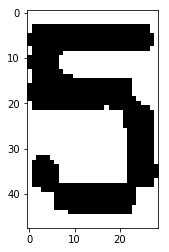

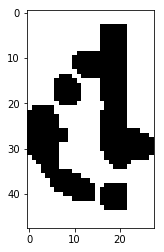

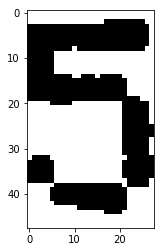

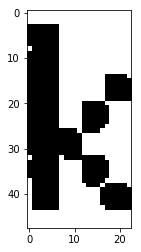

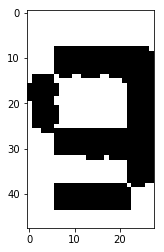

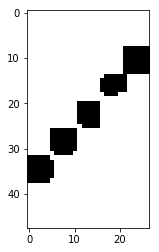

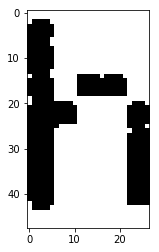

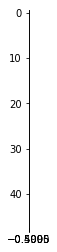

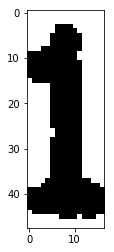

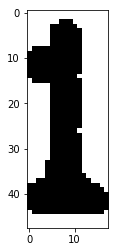

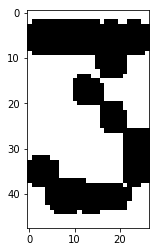

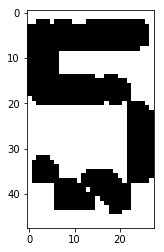

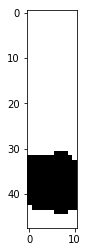

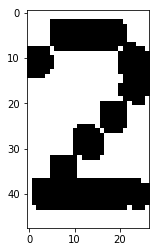

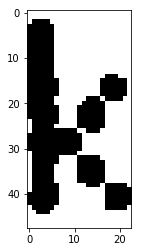

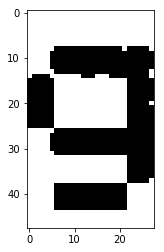

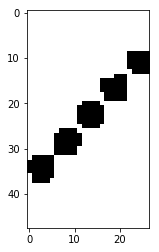

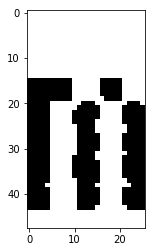

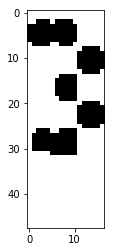

共22个数字


In [100]:
numbers_list=[]
for m in range(rows_num):
    for n in range(cols_num):
        img=masked[int(Rows_y[m][0]):int(Rows_y[m][1]),int(Cols_x[m][n][0]):int(Cols_x[m][n][1])]
        numbers_list.append(img)
        plt.imshow(img,'gray')
        plt.show()
print('共%d个数字'%len(numbers_list))
        

In [103]:
def code_to_score(code):
    codes={
        1111110 : 0,
        1101101 : 2,
        1111001 : 3,
        110110 : 4,
        1011011 : 5,
        1011111 : 6,
        1110000 : 7,
        1111111 : 8,
        1111011 : 9,
        1:+,
        
    }
    return codes.get(code,None)

def TubeIdentification(num_img):  #num_img  单个数字图像
    h, w = num_img.shape[:2]    #数字图像的高和宽
    #建立判断区域，共7个分别是a,b,c,d,e,f,g
    b=2/8*w                     #区域宽度
    l=3/8*w                     # 区域长度
    bound=1/22*w               #边框大小
    tubo_roi=[               #tubo_roi 存储区域坐标（x1,y1,x2,y2）的list
        [ w*1/2-l/2 , bound , w*1/2+l/2 , b+bound  ], # a
        [ w-b-bound, h*1/3-l/2 , w-bound , h*1/3+l/2 ], # b
        [ w-b-bound ,h*2/3-l/2 , w-bound , h*2/3+l/2 ], # c
        [ w*1/2-l/2 , h-b-bound , w*1/2+l/2 , h-bound],  #d
        [ bound , h*2/3-l/2 , b+bound , h*2/3+l/2  ], # e
        [ bound , h*1/3-l/2 , b+bound , h*1/3+l/2  ], # f
        [ w*1/2-l/2 , h*1/2-b/2 , w*1/2+l/2 , h*1/2+b/2 ] # g
        ];
    tubo_roi=np.array(tubo_roi).astype(int)
    
    for a in range(tubo_roi.shape[0]):       
        cv.rectangle(numbers_list[m], (tubo_roi[a][0], tubo_roi[a][1]), (tubo_roi[a][2], tubo_roi[a][3]), (0, 0, 0), 1)
    plt.imshow(numbers_list[m],'gray')
    plt.show()
    
    code=np.zeros(tubo_roi.shape[0]).astype(int)
    for n in range(tubo_roi.shape[0]):
        x1,y1,x2,y2=tubo_roi[n]
        size=np.abs(y2-y1)*np.abs(x2-x1)
        array=num_img[y1:y2,x1:x2]
        p=array[array == 0]
        count= np.size(p)    #每个区域的黑点数（像素为0的点的数量）
        if(count>size*1/2):
            code[n]=1
    print('数字对应编码为:',code)
    score=np.sum(code*[1000000,100000,10000,1000,100,10,1])  
    return code_to_score(score)      #返回读数  

SyntaxError: invalid syntax (<ipython-input-103-7717d5ef9947>, line 12)

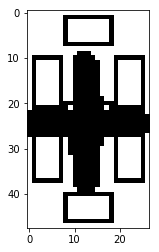

数字对应编码为: [0 0 0 0 0 0 1]


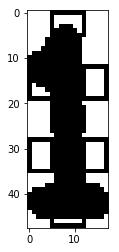

数字对应编码为: [1 0 0 1 0 1 1]


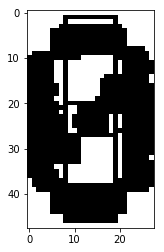

数字对应编码为: [1 1 1 1 1 1 1]


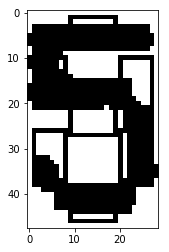

数字对应编码为: [1 0 1 1 1 1 0]


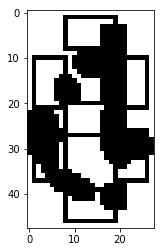

数字对应编码为: [0 0 1 1 1 0 0]


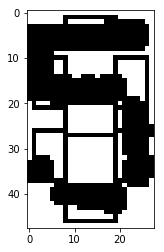

数字对应编码为: [1 0 1 1 0 1 0]


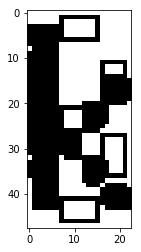

数字对应编码为: [0 1 0 0 1 1 1]


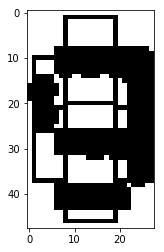

数字对应编码为: [0 1 1 1 0 1 0]


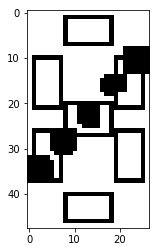

数字对应编码为: [0 1 0 0 1 0 1]


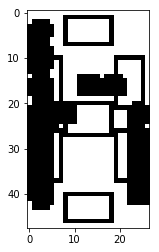

数字对应编码为: [0 0 1 0 1 1 0]


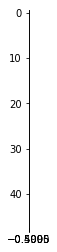

数字对应编码为: [0 0 0 0 0 0 0]


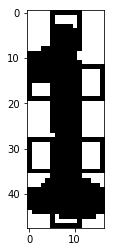

数字对应编码为: [1 0 0 1 0 1 1]


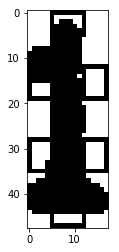

数字对应编码为: [1 0 0 1 0 1 1]


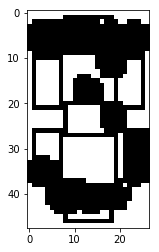

数字对应编码为: [1 0 1 1 1 0 0]


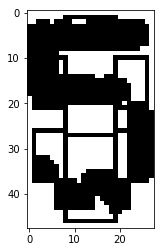

数字对应编码为: [1 0 1 1 1 1 0]


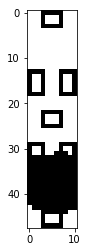

数字对应编码为: [0 0 1 0 1 0 0]


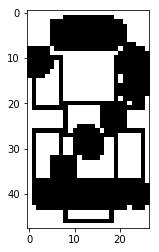

数字对应编码为: [1 1 0 1 0 0 1]


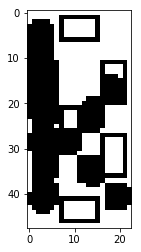

数字对应编码为: [0 1 0 0 1 1 1]


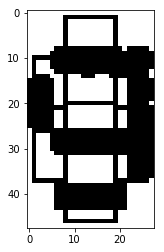

数字对应编码为: [0 1 1 1 0 1 0]


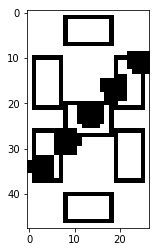

数字对应编码为: [0 1 0 0 1 0 1]


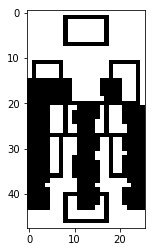

数字对应编码为: [0 0 1 1 1 1 1]


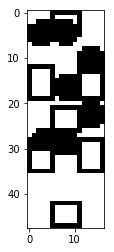

数字对应编码为: [1 0 0 0 1 0 0]
[None, None, 8, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [104]:
# h, w = numbers_list[0].shape[:2]
# print(h,w)

numberlist=[]
for m in range(len(numbers_list)):
    number=TubeIdentification(numbers_list[m])   #获取单个读数
    numberlist.append(number)  #读取到的数字的集合
    #rows_num   行数
    
print(numberlist)

In [71]:
#整理为最终读数
integer=0         #整数读数
integer_rate=1    #整数增长率
decimals=0
decimals_rate=0.1
if(rows_num==2):
    for h in range(cols_nums[0]-1,-1,-1): #第一行有cols_nums[0]个数
        integer=integer+numberlist[h]*integer_rate
        integer_rate=integer_rate*10 
    for k in range(rows_num,rows_num+cols_nums[1],1):  #第二行有cols_nums[1]个数
        decimals=decimals+numberlist[k]*decimals_rate
        decimals_rate=decimals_rate/10
final_num=integer+decimals
print('整数部分为：',integer)
print('小数部分为：',decimals)
print('最后读数为: %.2f'%final_num)

TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'